Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights
Objective: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?
Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?
Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?
Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.
Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown



In [3]:
#Part 1: Understanding Product Categories
# Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

#File in Google Drive
url = 'https://drive.google.com/uc?export=download&id=1lGu09FpMDjrzAJ5Hdw33m3FMrdR862Aw'

# Download from Google Drive
output = 'amz_uk_price_prediction_dataset.csv'
gdown.download(url, output, quiet=False)

# Read downloaded file into a pandas dataframe
df = pd.read_csv(output)

# show first 5 rows of the dataframe
print(df.head())



Downloading...
From (original): https://drive.google.com/uc?export=download&id=1lGu09FpMDjrzAJ5Hdw33m3FMrdR862Aw
From (redirected): https://drive.google.com/uc?export=download&id=1lGu09FpMDjrzAJ5Hdw33m3FMrdR862Aw&confirm=t&uuid=2f374b9b-48ad-4a9e-9261-e9e653d12b2e
To: c:\Users\Usuario\Downloads\amz_uk_price_prediction_dataset.csv
100%|██████████| 481M/481M [00:13<00:00, 34.7MB/s] 


   uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99         False                  0  Hi-Fi Speakers  
1    98099  23.99          True                  0  Hi-Fi Speakers  
2    15308  21.99         False                  0  Hi-Fi Speakers  
3     7205  31.99         False                  0  Hi-Fi Speakers  
4     1881  17.99         False                  0  Hi-Fi Speakers  


In [5]:
# 1. Generate a frequency table
category_counts = df['category'].value_counts()
pd.DataFrame(category_counts)


,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978
...,...
Alexa Built-In Devices,107
Motorbike Chassis,107
Plugs,107


In [6]:
#2.Top 5 most listed product categories:
proportion_table = df['category'].value_counts(normalize=True)
print(proportion_table)
top_5_categories = proportion_table.head(5)

# Display the top 5 categories
print("Top 5 most listed product categories:")
print(top_5_categories)

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
                                            ...   
Alexa Built-In Devices                    0.000044
Motorbike Chassis                         0.000044
Plugs                                     0.000044
Smart Home Security & Lighting            0.000043
Smart Speakers                            0.000022
Name: proportion, Length: 296, dtype: float64
Top 5 most listed product categories:
category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
Name: proportion, dtype: float64


<Figure size 1000x600 with 0 Axes>

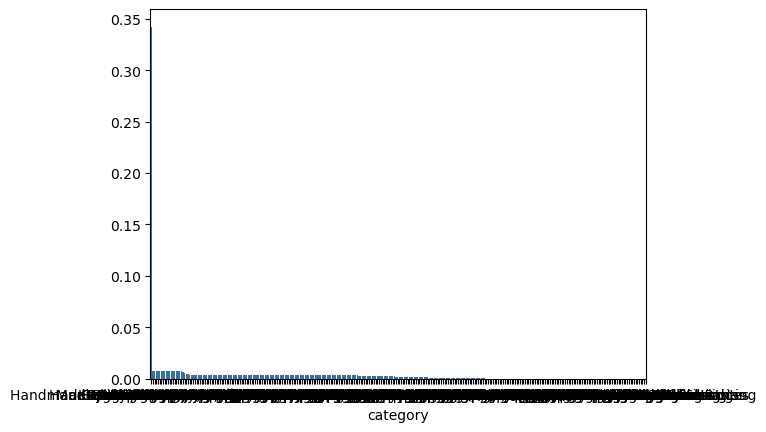

<Figure size 1000x600 with 0 Axes>

In [7]:
sns.barplot(x=proportion_table.index, y=proportion_table.values)
plt.figure(figsize=(10, 6))


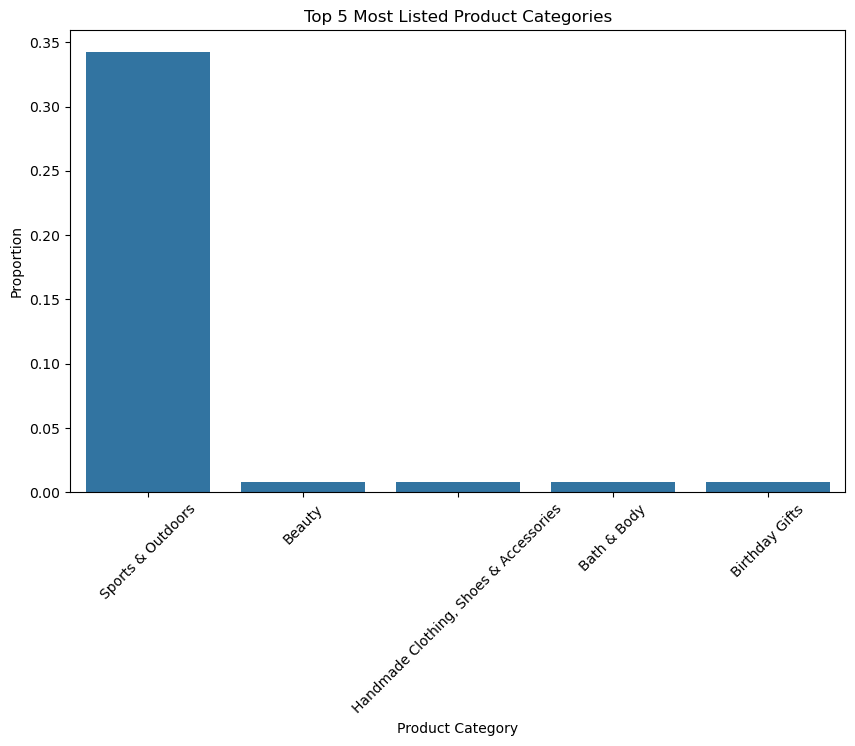

In [8]:
# Create a bar plot for the top 5 categories
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_categories.index, y=top_5_categories.values)

# Set the x-axis to have a 45-degree rotation for better readability
plt.xticks(rotation=45)

# Set plot labels and title
plt.xlabel('Product Category')
plt.ylabel('Proportion')
plt.title('Top 5 Most Listed Product Categories')

# Display the plot
plt.show()

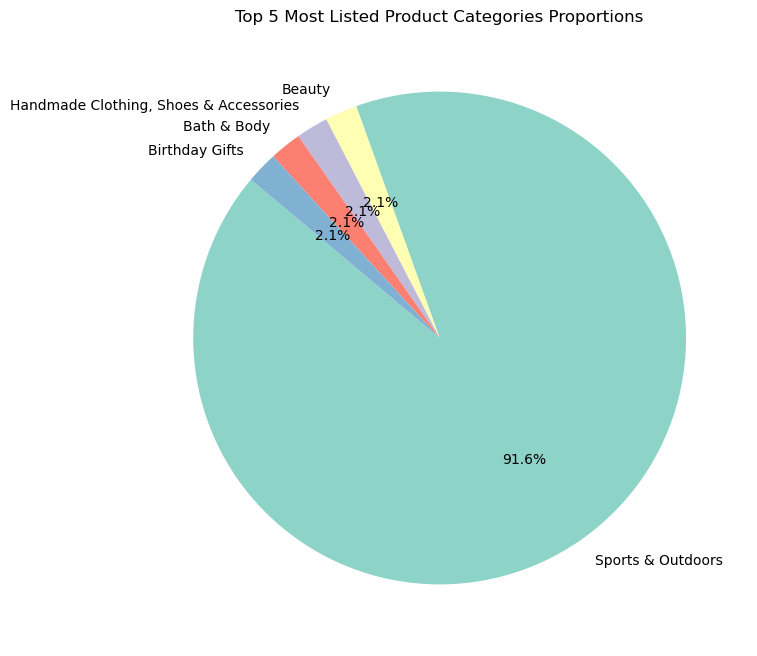

In [9]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_categories.values, labels=top_5_categories.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3", n_colors=5))

# Set the title
plt.title('Top 5 Most Listed Product Categories Proportions')

# Display the pie chart
plt.show()

In [10]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

print('Mean Price:', mean_price)
print('Median Price:', median_price)
print('Mode Price:', mode_price)

Mean Price: 89.24380943923663
Median Price: 19.09
Mode Price: 9.99


In [11]:
std_price = df['price'].std() #high standard deviation -> wide range of prices and suggests significant variability
var_price = df['price'].var() #High var -> large spread
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

print('STD Price:', std_price)
print('Var Price:', var_price)
print('Range Price:', range_price)
print('Quantiles Price:', quantiles_price)

STD Price: 345.60886175352226
Var Price: 119445.48532256528
Range Price: 100000.0
Quantiles Price: 0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64


In [4]:
skewness_price = df['price'].skew()
kurtosis_price = df['price'].kurtosis()
print(skewness_price)
print(kurtosis_price)

27.492977566280338
4241.616412866518


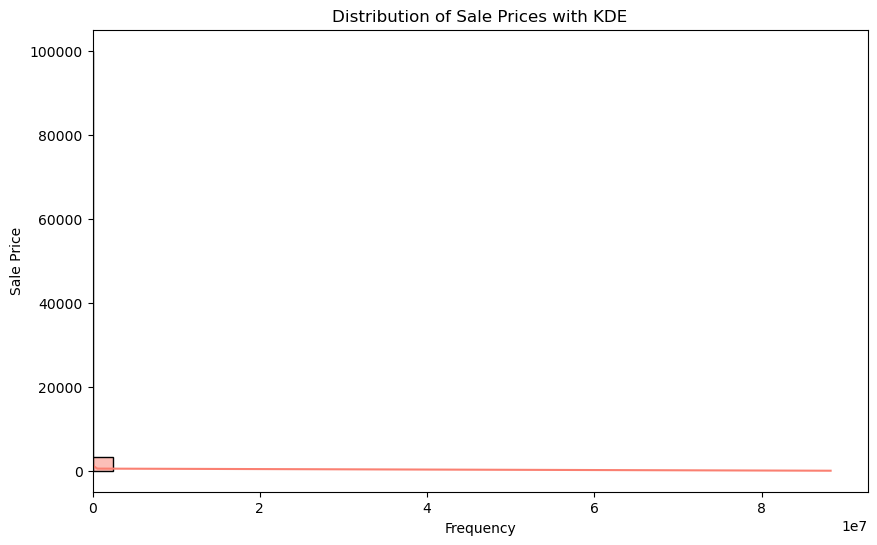

In [5]:
plt.figure(figsize=(10, 6))

# Create a histogram with KDE
sns.histplot(data=df, y='price', kde=True, bins=30, color="salmon")

# Set plot labels and title
plt.xlabel('Frequency')
plt.ylabel('Sale Price')
plt.title('Distribution of Sale Prices with KDE')

# Display the plot
plt.show()

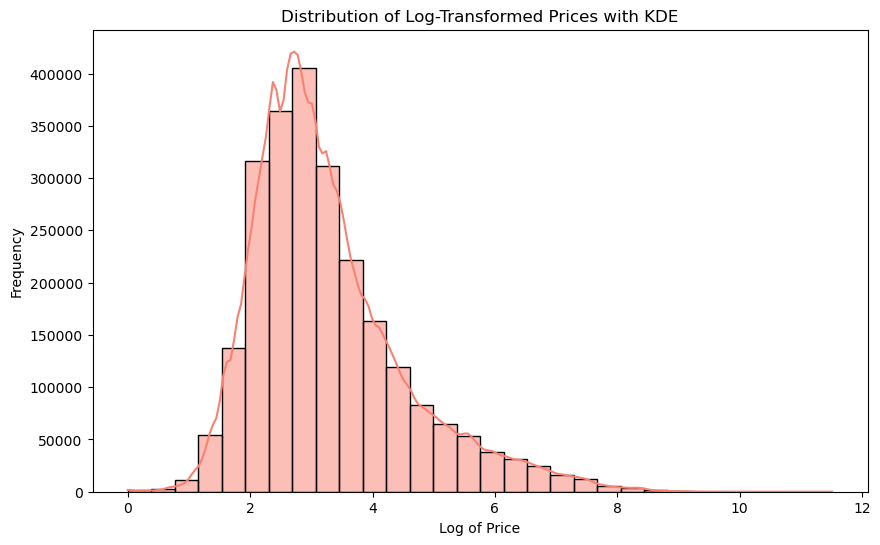

In [7]:
# Large var? 
# Apply log transformation to the price column
df['log_price'] = np.log1p(df['price'])  # log1p is used to handle zero values by computing log(1 + x)

# Visualize the log-transformed price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], kde=True, bins=30, color="salmon")

# Set plot labels and title
plt.xlabel('Log of Price')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Transformed Prices with KDE')

# Display the plot
plt.show()

In [8]:
mean_star = df['stars'].mean()
median_star = df['stars'].median()
mode_star = df['stars'].mode()[0]

print('Mean stars:', mean_star)
print('Median stars:', median_star)
print('Mode stars:', mode_star)

Mean stars: 2.152836472966065
Median stars: 0.0
Mode stars: 0.0


In [9]:
# Check for missing values
missing_values = df['stars'].isnull().sum()
print('Number of missing values:', missing_values)

# Check for zero values
zero_values = (df['stars'] == 0).sum()
print('Number of zero values:', zero_values)

Number of missing values: 0
Number of zero values: 1225641


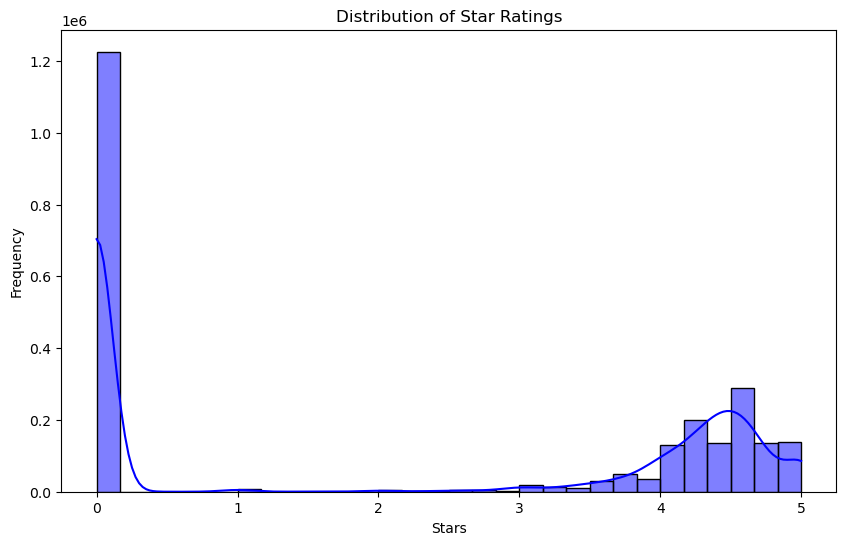

In [10]:
# Plot the distribution of the stars column
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], kde=True, bins=30, color="blue")

# Set plot labels and title
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.title('Distribution of Star Ratings')

# Display the plot
plt.show()

In [11]:
skewness_stars = df['stars'].skew()
kurtosis_stars = df['stars'].kurtosis()
print(skewness_stars)
print(kurtosis_stars)

0.08120735761080985
-1.9260061280432985
